In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import pathlib
from typing import Tuple, List

In [2]:
## Self explanatory
save_plots = True

## Toggle plot titles (off for thesis and papers, generally speaking)
show_titles = False

## Toggle plot grid
show_grid = False

## If false, only show data after pre-selection cuts (for comparison with real data)
show_no_cuts = True

## If true, require DTF with double m.c. to be successful
dtf_success = True

## If true, print plots in b&w to bankrupt thesis shops
bw = True

In [3]:
## Create plots directory, if missing
plot_directory = (str(pathlib.Path.home())
                  + '/preliminary-variable-studies/'
                  + 'plots/'
                  + 'explore_simulation/'
)
pathlib.Path(plot_directory).mkdir(parents=True, exist_ok=True)

# Import data

In [4]:
input_mc = str(pathlib.Path.home()) + '/data/LHCbMC_2016-2017-2018_MagUpDown_Lb2JPsiL_Ttracks_v12.h5'

In [5]:
df_reco = pd.read_hdf(input_mc, key='LHCbMC_Lb')
df_reco

,Lb_ENDVERTEX_X,Lb_ENDVERTEX_Y,Lb_ENDVERTEX_Z,L_ENDVERTEX_X,L_ENDVERTEX_Y,L_ENDVERTEX_Z,Jpsi_ENDVERTEX_X,Jpsi_ENDVERTEX_Y,Jpsi_ENDVERTEX_Z,L_PX,...,DTF_FixJPsiLambda_PIDSubs_p_PY,DTF_FixJPsiLambda_PIDSubs_p_PZ,DTF_FixJPsiLambda_PIDSubs_mum_PX,DTF_FixJPsiLambda_PIDSubs_mum_PY,DTF_FixJPsiLambda_PIDSubs_mum_PZ,DTF_FixJPsiLambda_PIDSubs_mup_PX,DTF_FixJPsiLambda_PIDSubs_mup_PY,DTF_FixJPsiLambda_PIDSubs_mup_PZ,TrackType,MC_key
Rec_key,,,,,,,,,,,,,,,,,,,,,
0,0.952388,-0.165336,26.651770,402.777832,-229.470520,5536.814453,0.9524,-0.1653,26.652201,1910.136719,...,-186.566345,5411.963379,-804.469727,-535.944397,22858.960938,1438.071777,1619.347290,23634.302734,T,0
1,0.845292,-0.195122,3.622388,139.395874,322.585419,7428.522461,0.8453,-0.1950,3.620400,481.652618,...,222.666214,4137.976074,-605.608093,594.454895,11170.495117,71.893692,-2873.631348,73489.484375,T,29
2,-0.480003,-0.762014,18.670696,-819.340149,-626.124390,5389.564453,-0.4801,-0.7620,18.671101,-5395.257812,...,-323.442810,2628.927246,4.108163,-790.314697,5651.807129,-5579.078613,-431.151581,23151.667969,T,69
3,1.681797,-2.255294,-36.569271,113.645294,-329.222229,4678.392090,1.6818,-2.2553,-36.569199,7835.708984,...,-1702.511353,24506.517578,8712.822266,-18033.572266,231397.500000,336.531647,-3496.248779,45100.238281,T,119
4,0.824895,-0.252737,74.871048,-100.702072,60.565861,6466.218750,0.8242,-0.2542,74.883598,-74.406654,...,135.662018,8106.856445,-3448.149902,-1045.294434,90591.554688,588.637329,239.301941,10912.332031,T,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
366391,0.964920,0.161698,-12.157676,293.129822,39.016293,7097.797363,0.9649,0.1621,-12.151800,3175.616943,...,-18.306223,7767.518555,1504.345581,715.472656,49351.718750,-112.221489,2933.706299,37641.914062,T,8921673
366392,-0.498788,1.215896,21.856564,-176.847626,145.914993,8691.596680,-0.5001,1.2166,21.869101,-2664.720215,...,-50.586430,-2812.631592,-3547.666504,1885.741577,33505.289062,-1337.816284,1466.083374,45027.328125,T,8921702
366393,0.114458,-0.046962,25.276293,-29.465662,-15.364128,949.110657,0.1145,-0.0469,25.275400,-6107.898926,...,-133.646973,15975.192383,-3526.683594,-343.335175,44636.988281,-3534.635254,-3121.734619,91762.195312,T,8921772


In [6]:
df_truth = pd.read_hdf(input_mc, key='LHCbMCTruth_Lb')
df_truth

,MCTRUTH_Lb_ENDVERTEX_X,MCTRUTH_Lb_ENDVERTEX_Y,MCTRUTH_Lb_ENDVERTEX_Z,MCTRUTH_L_ENDVERTEX_X,MCTRUTH_L_ENDVERTEX_Y,MCTRUTH_L_ENDVERTEX_Z,MCTRUTH_p_PX,MCTRUTH_p_PY,MCTRUTH_p_PZ,MCTRUTH_pim_PX,...,mup_PP_X,mup_PP_Y,mup_PP_Z,mup_PP_PX,mup_PP_PY,mup_PP_PZ,mup_PP_Weight,Rec_key,N_rec_matches,TrackType
MC_key,,,,,,,,,,,,,,,,,,,,,
0,0.9512,-0.1669,26.401600,343.742889,-192.429398,4751.548828,2031.640015,-1218.119995,29336.890625,445.510010,...,0.6208,-0.5355,21.231701,1448.819824,1628.266357,23763.910156,0.975000,0,1,T
1,0.4619,-0.3471,-52.081200,-19.765400,-33.384300,45.136002,-1190.050049,-1817.560059,5618.410156,-125.169998,...,0.2795,-0.4641,-50.938000,-3430.944092,-2054.681885,20444.863281,1.000000,-1,0,NA
2,0.8623,-0.0693,39.078201,145.114395,-70.015701,2563.685059,1349.000000,-574.190002,22276.189453,239.940002,...,0.1603,-0.3852,34.265598,1869.628418,869.200012,13080.188477,1.000000,-1,0,NA
3,0.8441,-0.1694,17.714300,-9.207400,27.546700,3520.887207,-295.320007,790.229980,93841.296875,3.170000,...,0.4994,-0.5171,14.525300,491.177612,513.784912,5034.924805,1.000000,-1,0,NA
4,0.6610,-0.4327,7.083600,-23.592199,-54.290798,201.384293,-1843.489990,-4303.959961,15525.910156,-361.470001,...,-0.0085,-0.3661,9.187500,-2067.989014,93.588974,6374.103027,1.000000,-1,0,NA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8921810,0.7382,-0.1062,0.347100,-2.454600,0.459400,68.980499,-1052.079956,169.649994,21721.480469,-270.470001,...,0.5466,-0.3809,3.584800,-1646.731689,-2497.763672,30773.214844,0.942857,-1,0,NA
8921811,0.6401,-0.0814,27.420200,4.920900,-10.475100,58.229698,680.200012,-1542.880005,4852.310059,153.279999,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,0,NA
8921812,2.0908,-1.0901,46.602200,36.268501,-29.632999,1175.768677,4569.680176,-3904.929932,153438.671875,582.070007,...,0.3603,0.4048,30.488100,1073.656860,-936.144836,10031.811523,0.975000,-1,0,NA


In [7]:
df_mc = pd.merge(df_truth.loc[df_truth['Rec_key'] >= 0], df_reco, left_index=True, right_on='MC_key')
df_mc = df_mc.loc[(df_mc['MC_key'] >= 0) & (df_mc['Rec_key'] >= 0)]
df_mc

,MCTRUTH_Lb_ENDVERTEX_X,MCTRUTH_Lb_ENDVERTEX_Y,MCTRUTH_Lb_ENDVERTEX_Z,MCTRUTH_L_ENDVERTEX_X,MCTRUTH_L_ENDVERTEX_Y,MCTRUTH_L_ENDVERTEX_Z,MCTRUTH_p_PX,MCTRUTH_p_PY,MCTRUTH_p_PZ,MCTRUTH_pim_PX,...,DTF_FixJPsiLambda_PIDSubs_p_PY,DTF_FixJPsiLambda_PIDSubs_p_PZ,DTF_FixJPsiLambda_PIDSubs_mum_PX,DTF_FixJPsiLambda_PIDSubs_mum_PY,DTF_FixJPsiLambda_PIDSubs_mum_PZ,DTF_FixJPsiLambda_PIDSubs_mup_PX,DTF_FixJPsiLambda_PIDSubs_mup_PY,DTF_FixJPsiLambda_PIDSubs_mup_PZ,TrackType_y,MC_key
Rec_key,,,,,,,,,,,,,,,,,,,,,
0,0.9512,-0.1669,26.401600,343.742889,-192.429398,4751.548828,2031.640015,-1218.119995,29336.890625,445.510010,...,-186.566345,5411.963379,-804.469727,-535.944397,22858.960938,1438.071777,1619.347290,23634.302734,T,0
1,0.8237,-0.2123,3.514200,140.238602,325.837311,7463.102539,367.250000,1035.959961,24602.169922,174.279999,...,222.666214,4137.976074,-605.608093,594.454895,11170.495117,71.893692,-2873.631348,73489.484375,T,29
2,-0.4798,-0.7758,18.706800,-785.810974,-591.072998,5157.507812,-5172.310059,-3904.530029,34147.730469,-470.119995,...,-323.442810,2628.927246,4.108163,-790.314697,5651.807129,-5579.078613,-431.151581,23151.667969,T,69
3,1.6829,-2.2522,-36.520901,94.709503,-270.525391,3823.881348,5635.350098,-15984.469727,230495.453125,604.909973,...,-1702.511353,24506.517578,8712.822266,-18033.572266,231397.500000,336.531647,-3496.248779,45100.238281,T,119
5,2.2347,-3.0136,-3.515400,-41.785000,-495.398499,2890.112793,-144.789993,-1430.229980,8650.469727,-27.309999,...,-514.345398,2560.247559,2766.051025,-6544.098633,37503.421875,4405.509766,-5917.182129,27155.025391,T,202
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
366391,0.9741,0.2091,-11.659000,294.090698,39.875000,7125.287109,2412.750000,405.109985,60216.011719,395.200012,...,-18.306223,7767.518555,1504.345581,715.472656,49351.718750,-112.221489,2933.706299,37641.914062,T,8921673
366392,-0.5103,1.2180,21.928400,-148.940399,123.715599,7319.557129,-1238.500000,978.909973,57653.351562,-45.599998,...,-50.586430,-2812.631592,-3547.666504,1885.741577,33505.289062,-1337.816284,1466.083374,45027.328125,T,8921702
366393,0.1275,-0.0589,25.113001,-123.851601,-28.034100,2985.664307,-6471.830078,-1487.530029,153226.906250,-561.440002,...,-133.646973,15975.192383,-3526.683594,-343.335175,44636.988281,-3534.635254,-3121.734619,91762.195312,T,8921772


In [8]:
try:
    del(df_truth)
except NameError:
    pass

try:
    del(df_reco)
except NameError:
    pass

## Pre-selection cuts

In [9]:
jpsi_pdg_mass = 3096.900

In [10]:
def p_modulus(px, py, pz):
    return np.sqrt(px**2 + py**2 + pz**2)

def transverse_p_modulus(px, py):
    return np.sqrt(px**2 + py**2)

In [11]:
## Missing "combined" invariant masses (for Lambda->p pim and Lambdab->JPsi Lambda)
## These are the AM in the DaVinci config file. Did Salvatore implement them somewhere?

pion_p_cuts = (
    (p_modulus(df_mc['pim_PX'], df_mc['pim_PY'], df_mc['pim_PZ']) > 2000)
    & (p_modulus(df_mc['pim_PX'], df_mc['pim_PY'], df_mc['pim_PZ']) < 5e5)
)

proton_p_cuts = (
    (p_modulus(df_mc['p_PX'], df_mc['p_PY'], df_mc['p_PZ']) > 10000)
    & (p_modulus(df_mc['p_PX'], df_mc['p_PY'], df_mc['p_PZ']) < 5e5)
)

proton_pt_cuts = transverse_p_modulus(df_mc['p_PX'], df_mc['p_PY']) > 400

lambda_m_cuts = (df_mc['L_M'] > 600) & (df_mc['L_M'] < 1500)
lambda_mm_cuts = df_mc['L_MM'] < 1500
lambda_z_cuts = (df_mc['L_ENDVERTEX_Z'] > 5500) & (df_mc['L_ENDVERTEX_Z'] < 8500)
lambda_dira_cuts = df_mc['L_BPVDIRA'] > 0.9999
lambda_ipchi2_cuts = df_mc['L_BPVIPCHI2'] < 200
lambda_vdchi2_cuts = df_mc['L_BPVVDCHI2'] < 2e7
lambda_chi2_cuts = df_mc['L_VFASPF_CHI2_VDOF'] < 750
lambda_pt_cuts = transverse_p_modulus(df_mc['L_PX'], df_mc['L_PY']) > 450

jpsi_m_cuts = abs(df_mc['Jpsi_M'] - jpsi_pdg_mass) < 90

lambdab_m_cuts = df_mc['Lb_M'] < 8500
lambdab_dira_cuts = abs(df_mc['Lb_BPVDIRA']) > 0.99
lambdab_ipchi2_cuts = df_mc['Lb_BPVIPCHI2'] < 1750
lambdab_chi2_cuts = df_mc['Lb_VFASPF_CHI2_VDOF'] < 150

dtf_success_cuts = df_mc['DTF_FixJPsiLambda_status'] == 'Success'

In [12]:
pre_selection_cuts = (
    pion_p_cuts &
    proton_p_cuts &
    proton_pt_cuts &
    lambda_m_cuts &
    lambda_mm_cuts &
    lambda_z_cuts &
    lambda_dira_cuts &
    lambda_ipchi2_cuts &
    lambda_vdchi2_cuts &
    lambda_chi2_cuts &
    lambda_pt_cuts &
    jpsi_m_cuts &
    lambdab_m_cuts &
    lambdab_dira_cuts &
    lambdab_ipchi2_cuts &
    lambdab_chi2_cuts
)

if dtf_success:
    pre_selection_cuts = pre_selection_cuts & dtf_success_cuts

df_mc[pre_selection_cuts]

,MCTRUTH_Lb_ENDVERTEX_X,MCTRUTH_Lb_ENDVERTEX_Y,MCTRUTH_Lb_ENDVERTEX_Z,MCTRUTH_L_ENDVERTEX_X,MCTRUTH_L_ENDVERTEX_Y,MCTRUTH_L_ENDVERTEX_Z,MCTRUTH_p_PX,MCTRUTH_p_PY,MCTRUTH_p_PZ,MCTRUTH_pim_PX,...,DTF_FixJPsiLambda_PIDSubs_p_PY,DTF_FixJPsiLambda_PIDSubs_p_PZ,DTF_FixJPsiLambda_PIDSubs_mum_PX,DTF_FixJPsiLambda_PIDSubs_mum_PY,DTF_FixJPsiLambda_PIDSubs_mum_PZ,DTF_FixJPsiLambda_PIDSubs_mup_PX,DTF_FixJPsiLambda_PIDSubs_mup_PY,DTF_FixJPsiLambda_PIDSubs_mup_PZ,TrackType_y,MC_key
Rec_key,,,,,,,,,,,,,,,,,,,,,
1,0.8237,-0.2123,3.514200,140.238602,325.837311,7463.102539,367.250000,1035.959961,24602.169922,174.279999,...,222.666214,4137.976074,-605.608093,594.454895,11170.495117,71.893692,-2873.631348,73489.484375,T,29
14,0.9904,-0.2075,-9.769600,224.561996,56.081600,5921.048828,2894.560059,699.140015,74302.851562,293.929993,...,104.645416,10220.954102,-884.967468,195.843964,34903.839844,1645.699585,-1113.117432,24484.212891,T,367
17,0.8236,-0.2738,28.986401,-296.374695,-100.123802,5963.561523,-1268.760010,-522.340027,25478.310547,-184.460007,...,20.153040,3543.737305,-829.315674,-926.117676,37815.328125,2614.833252,-1553.520630,63936.839844,T,493
22,0.7534,-0.2931,-1.211400,-38.645302,-105.471802,7776.826172,-649.429993,-1605.150024,113660.250000,-26.830000,...,-212.451355,21583.396484,-1120.001343,617.919861,42654.800781,-1715.901855,-2823.659180,61855.921875,T,557
23,0.6816,-0.1256,-69.357803,-842.685730,554.711914,4903.516602,-4999.830078,3343.699951,29197.720703,-1027.900024,...,608.672302,6324.328125,-4228.179688,1785.341675,18403.882812,-106.489746,-762.340759,4744.328613,T,572
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
366327,0.1985,-0.1576,-19.471500,-207.092300,-37.506302,6777.450195,-2266.669922,-458.640015,76301.921875,-294.079987,...,11.039152,7001.399414,-21.106155,590.822510,6469.677734,-4038.527100,-3013.788818,66493.257812,T,8920122
366331,0.8633,0.1466,-68.771400,-63.068901,-245.641098,6745.173828,-477.579987,-2102.550049,59762.968750,-199.369995,...,-527.474792,12987.607422,-1450.088257,-2851.202637,36621.058594,-248.967667,760.289551,5327.538574,T,8920230
366333,1.1884,-0.0951,69.203400,111.651604,74.976997,6779.822754,1028.930054,635.940002,62082.968750,293.480011,...,359.789764,23482.865234,860.183899,-878.939331,13367.183594,371.847900,-2149.595215,118211.546875,T,8920398


# Explore simulation data

## Helper functions

In [13]:
def all_vs_preselection_plot(
    series: pd.Series,
    binning: int,
    x_range: Tuple[float],
    title: str,
    x_label: str,
    file_name: str,
    zero_vline: bool = False,
    log_scale: bool = False,
    show_title: bool = True,
    show_grid: bool = True,
    black_and_white: bool = False,
    scientific_notation: bool = False,
    legend_loc: str = 'best',
    show_no_cuts: bool = True
) -> None:
    
    ## Common plot parameters
    common_plot_params = {
        'range': x_range,
        'bins': binning,
    }
    
    ## Cut-specific plot parameters
    no_cuts_plot_params = {
        'label': 'All events'
    }
    
    pre_selection_plot_params = {
        'label': 'With pre-selection'
    }
    
    ## With color or b&w?
    if black_and_white:
        common_plot_params['histtype'] = 'stepfilled'
        common_plot_params['edgecolor'] = 'black'
        no_cuts_plot_params['color'] = 'dimgrey'
        no_cuts_plot_params['hatch'] = '--'
        pre_selection_plot_params['color'] = 'gainsboro' 
        pre_selection_plot_params['hatch'] = '//' 
    else:
        no_cuts_plot_params['color'] = 'darkred'
        no_cuts_plot_params['alpha'] = 0.7
        pre_selection_plot_params['color'] = 'goldenrod'
    
    ## No cuts
    if show_no_cuts:
        plt.hist(series, **common_plot_params, **no_cuts_plot_params)
    
    ## With pre-selection cuts
    plt.hist(series.loc[pre_selection_cuts], **common_plot_params, **pre_selection_plot_params)
    
    if zero_vline:
        plt.axvline(0, 0, 100, color='black', linestyle='--')
    
    if log_scale:
        plt.yscale('log')
    
    if show_grid:
        plt.grid()
        
    if scientific_notation:
        plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))
    
    plt.xlabel(x_label)
    plt.ylabel("Events")
    
    if show_no_cuts:
        plt.legend(frameon=False, loc=legend_loc)
        title_presel_addon = ''
    else:
        title_presel_addon = ', with pre-selection'
        
    if show_title:
        plt.title(title + '\n(MC simulation' + title_presel_addon + ')')
    
    if save_plots:
        plt.savefig(plot_directory + file_name + '.pdf', bbox_inches = 'tight')

    plt.show()

In [14]:
def all_or_preselection_hist2d(
    series_x: pd.Series,
    series_y: pd.Series,
    label_x: str,
    label_y: str,
    range_x: List[float],
    range_y: List[float],
    title: str,
    binning: int,
    file_name: str,
    with_preselection: bool = False,
    show_title: bool = True,
    black_and_white: bool = False
) -> None:
    
    plot_params = {
        'range': [range_x, range_y],
        'bins': binning
    }
    
    if black_and_white:
        plot_params['cmap'] = 'gray'
    else:
        plot_params['cmap'] = 'turbo'
        
    if with_preselection:
        selection = pre_selection_cuts
        title_presel_addon = ', with pre-selection'
    else:
        selection = pd.Series(True, index=series_x.index)
        title_presel_addon = ', all events'
        
    plt.hist2d(series_x.loc[selection], series_y.loc[selection], **plot_params)
    
    if show_title:
        plt.title(title + '\n(MC simulation' + title_presel_addon + ')')
    
    plt.xlabel(label_x)
    plt.ylabel(label_y)
    plt.colorbar(label='Events')
    
    if save_plots:
        plt.savefig(plot_directory + file_name + '.pdf', bbox_inches = 'tight')
    
    plt.show()

## $\Lambda^0$ decay vertex

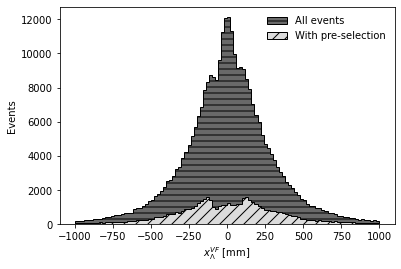

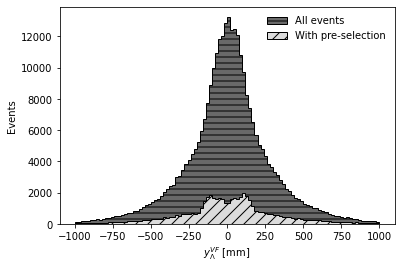

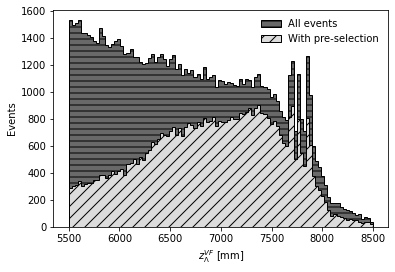

In [15]:
component_to_x_range = {
    'x': (-1000, 1000),
    'y': (-1000, 1000),
    'z': (5500, 8500)
}

for comp in ['x', 'y', 'z']:
    plot_parameters = {
        'binning': 100,
        'x_range': component_to_x_range[comp],
        'title': '$\Lambda^0$ decay vertex: reconstructed $' + comp + '$',
        'x_label': '$' +  comp + '_\Lambda^{VF}$ [mm]',
        'file_name': 'Lambda_endvertex_' + comp,
        'zero_vline': False,
        'log_scale': False,
        'show_title': show_titles,
        'black_and_white': bw,
        'show_grid': show_grid,
        'show_no_cuts': show_no_cuts
    }

    all_vs_preselection_plot(
        df_mc['L_ENDVERTEX_' + comp.upper()],
        **plot_parameters)

Take note of the three peaks in the $[7.5,8.0]\,\text{m}$ region.

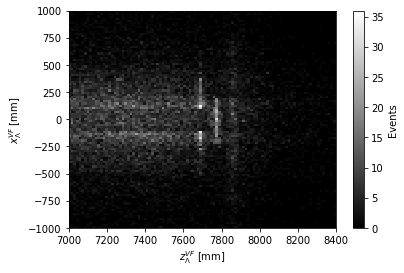

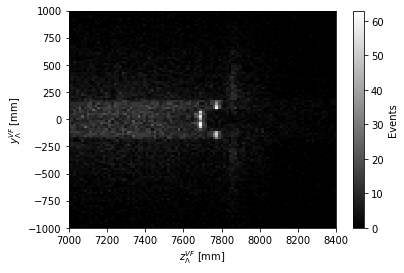

In [16]:
for comp_y in ['x', 'y']:
    plot_parameters = {
        'binning': 100,
        'range_x': [7000,8400],
        'range_y': [-1000,1000],
        'title': '$\Lambda^0$ decay vertex: reconstructed $z$ vs. $' + comp_y + '$',
        'label_x': '$z_\Lambda^{VF}$ [mm]',
        'label_y': '$' +  comp_y + '_\Lambda^{VF}$ [mm]',
        'file_name': 'Lambda_endvertex_z_vs_' + comp_y,
        'with_preselection': True,
        'show_title': show_titles,
        'black_and_white': bw,
    }
    
    all_or_preselection_hist2d(
        df_mc['L_ENDVERTEX_Z'],
        df_mc['L_ENDVERTEX_' + comp_y.upper()],
        **plot_parameters
    )

"Wow! Cool substructures!"

"Thanks. The T1 tracking station made them for me."

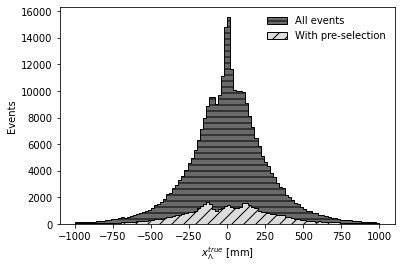

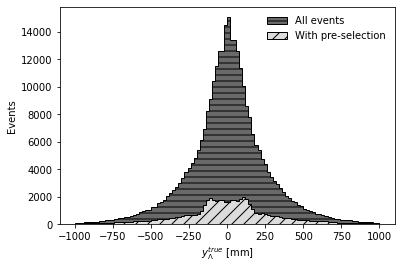

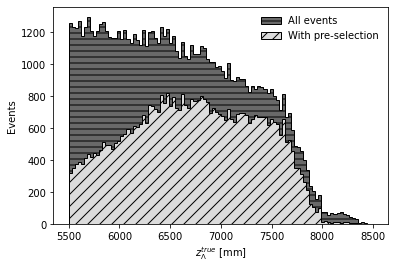

In [17]:
component_to_x_range = {
    'x': (-1000, 1000),
    'y': (-1000, 1000),
    'z': (5500, 8500)
}

for comp in ['x', 'y', 'z']:
    plot_parameters = {
        'binning': 100,
        'x_range': component_to_x_range[comp],
        'title': '$\Lambda^0$ decay vertex: true $' + comp + '$',
        'x_label': '$' +  comp + '_\Lambda^{true}$ [mm]',
        'file_name': 'Lambda_endvertex_' + comp + '_true',
        'zero_vline': False,
        'log_scale': False,
        'show_title': show_titles,
        'black_and_white': bw,
        'show_grid': show_grid,
        'show_no_cuts': show_no_cuts
    }

    all_vs_preselection_plot(
        df_mc['MCTRUTH_L_ENDVERTEX_' + comp.upper()],
        **plot_parameters)

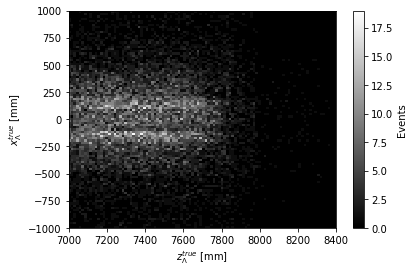

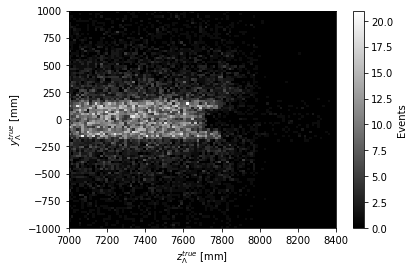

In [18]:
t_station_selection = (df_mc['L_ENDVERTEX_Z'] >= 7000) & (df_mc['L_ENDVERTEX_Z'] <= 8400)

for comp_y in ['x', 'y']:
    plot_parameters = {
        'binning': 100,
        'range_x': [7000,8400],
        'range_y': [-1000,1000],
        'title': '$\Lambda^0$ decay vertex: true $z$ vs. $' + comp_y + '$',
        'label_x': '$z_\Lambda^{true}$ [mm]',
        'label_y': '$' +  comp_y + '_\Lambda^{true}$ [mm]',
        'file_name': 'Lambda_endvertex_z_vs_' + comp_y + '_true',
        'with_preselection': True,
        'show_title': show_titles,
        'black_and_white': bw,
    }
    
    all_or_preselection_hist2d(
        df_mc.loc[t_station_selection, 'MCTRUTH_L_ENDVERTEX_Z'],
        df_mc.loc[t_station_selection, 'MCTRUTH_L_ENDVERTEX_' + comp_y.upper()],
        **plot_parameters
    )

They are *not* in the true data. Very sad. At least we don't have to worry about spin perturbation when interacting with the material.

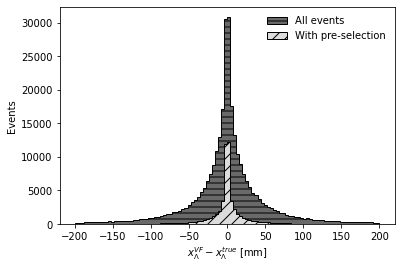

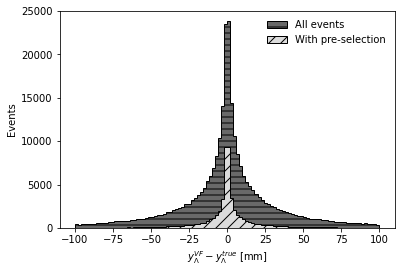

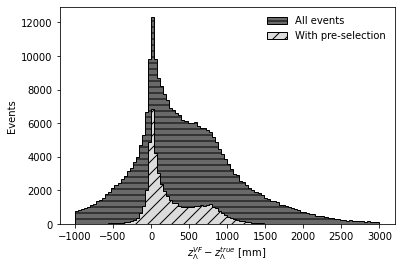

In [19]:
component_to_x_range = {
    'x': (-200, 200),
    'y': (-100, 100),
#    'z': (-1000, 8500)
    'z': (-1000, 3000)
}

for comp in ['x', 'y', 'z']:
    plot_parameters = {
        'binning': 100,
        'x_range': component_to_x_range[comp],
        'title': '$\Lambda^0$ decay vertex: $' + comp + '$ bias',
        'x_label': '$' +  comp + '_\Lambda^{VF} - ' + comp + '_\Lambda^{true}$ [mm]',
        'file_name': 'Lambda_endvertex_bias_' + comp,
        'zero_vline': False,
        'log_scale': False,
        'show_title': show_titles,
        'black_and_white': bw,
        'show_grid': show_grid,
        'show_no_cuts': show_no_cuts
    }

    all_vs_preselection_plot(
        df_mc['L_ENDVERTEX_' + comp.upper()] - df_mc['MCTRUTH_L_ENDVERTEX_' + comp.upper()],
        **plot_parameters)

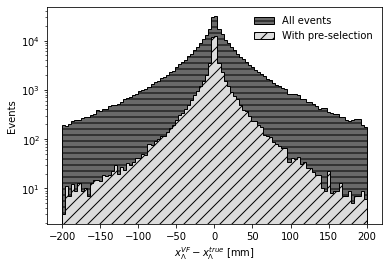

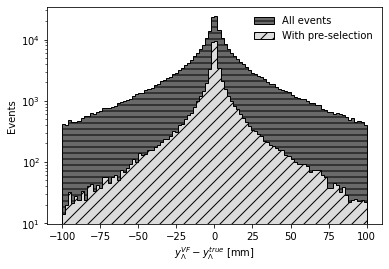

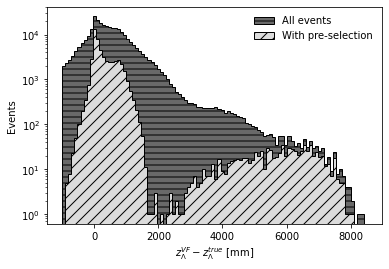

In [20]:
component_to_x_range = {
    'x': (-200, 200),
    'y': (-100, 100),
    'z': (-1000, 8500)
#    'z': (-1000, 3000)
}

for comp in ['x', 'y', 'z']:
    plot_parameters = {
        'binning': 100,
        'x_range': component_to_x_range[comp],
        'title': '$\Lambda^0$ decay vertex: $' + comp + '$ bias',
        'x_label': '$' +  comp + '_\Lambda^{VF} - ' + comp + '_\Lambda^{true}$ [mm]',
        'file_name': 'Lambda_endvertex_bias_' + comp + '_log',
        'zero_vline': False,
        'log_scale': True,
        'show_title': show_titles,
        'black_and_white': bw,
        'show_grid': show_grid,
        'show_no_cuts': show_no_cuts
    }

    all_vs_preselection_plot(
        df_mc['L_ENDVERTEX_' + comp.upper()] - df_mc['MCTRUTH_L_ENDVERTEX_' + comp.upper()],
        **plot_parameters)

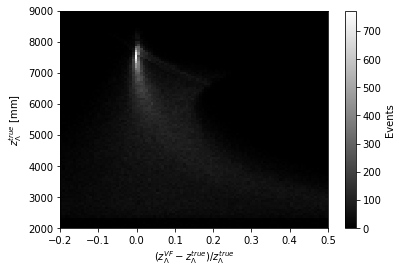

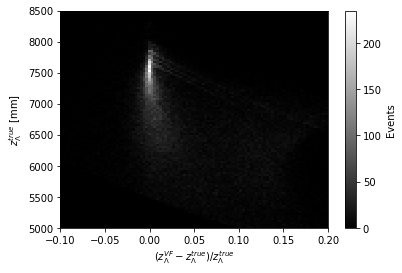

In [21]:
plot_parameters = {
    'binning': 100,
    'title': '$\Lambda^0$ decay vertex: relative $z$ bias vs. $z$',
    'label_x': '$(z_\Lambda^{VF} - z_\Lambda^{true})/z_\Lambda^{true}$',
    'label_y': '$z_\Lambda^{true}$ [mm]',
    'show_title': show_titles,
    'black_and_white': bw,
}

no_presel_parameters = {
    'with_preselection': False,
    'range_x': [-0.2,0.5],
    'range_y': [2000,9000],
    'file_name': 'Lambda_endvertex_z_relbias_vs_z_true_alldata'
}

with_presel_parameters = {
    'with_preselection': True,
    'range_x': [-0.1,0.2],
    'range_y': [5000,8500],
    'file_name': 'Lambda_endvertex_z_relbias_vs_z_true_presel'
}

all_or_preselection_hist2d(
    (df_mc['L_ENDVERTEX_Z'] - df_mc['MCTRUTH_L_ENDVERTEX_Z'])/df_mc['MCTRUTH_L_ENDVERTEX_Z'],
    df_mc['MCTRUTH_L_ENDVERTEX_Z'],
    **plot_parameters,
    **no_presel_parameters
)


all_or_preselection_hist2d(
    (df_mc['L_ENDVERTEX_Z'] - df_mc['MCTRUTH_L_ENDVERTEX_Z'])/df_mc['MCTRUTH_L_ENDVERTEX_Z'],
    df_mc['MCTRUTH_L_ENDVERTEX_Z'],
    **plot_parameters,
    **with_presel_parameters
)

## $\Lambda^0$ invariant mass

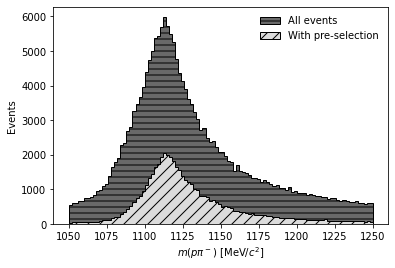

In [22]:
plot_parameters = {
    'binning': 100,
    'x_range': (1050,1250),
    'title': '$\Lambda^0$ invariant mass: Vertex Fitter',
    'x_label': '$m(p\pi^-)$ [MeV/$c^2$]',
    'file_name': 'Lambda_mass_VF',
    'zero_vline': False,
    'log_scale': False,
    'show_title': show_titles,
    'black_and_white': bw,
    'show_grid': show_grid,
    'show_no_cuts': show_no_cuts
}

all_vs_preselection_plot(
    df_mc['L_M'],
    **plot_parameters)

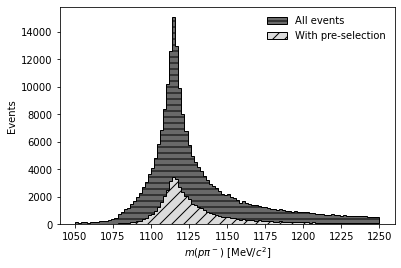

In [23]:
plot_parameters = {
    'binning': 100,
    'x_range': (1050,1250),
    'title': '$\Lambda^0$ invariant mass: Decay Tree Fitter w/ $J/\psi$ mass constraint',
    'x_label': '$m(p\pi^-)$ [MeV/$c^2$]',
    'file_name': 'Lambda_mass_DTF_FixJPsi',
    'zero_vline': False,
    'log_scale': False,
    'show_title': show_titles,
    'black_and_white': bw,
    'show_grid': show_grid,
    'show_no_cuts': show_no_cuts
}

all_vs_preselection_plot(
    df_mc['DTF_FixJPsi_L_M'],
    **plot_parameters)

## $\Lambda^0$ vertex $\tilde\chi^2$

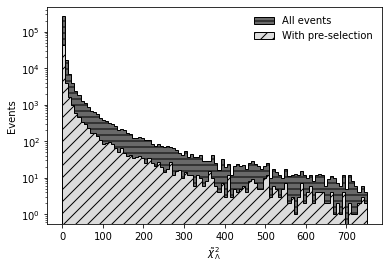

In [24]:
plot_parameters = {
    'binning': 100,
    'x_range': (0,750),
    'title': r'$\Lambda^0 \rightarrow p \pi^-$ vertex $\tilde\chi^2$',
    'x_label': r'$\tilde\chi^2_\Lambda$',
    'file_name': 'Lambda_chi2',
    'zero_vline': False,
    'log_scale': True,
    'show_title': show_titles,
    'black_and_white': bw,
    'show_grid': show_grid,
    'show_no_cuts': show_no_cuts
}

all_vs_preselection_plot(
    df_mc['L_VFASPF_CHI2_VDOF'],
    **plot_parameters)

## $\Lambda^0_b$ vertex $\tilde\chi^2$

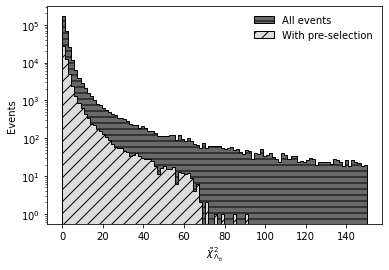

In [25]:
plot_parameters = {
    'binning': 100,
    'x_range': (0,150),
    'title': r'$\Lambda^0_b \rightarrow J/\psi \Lambda^0$ vertex $\tilde\chi^2$',
    'x_label': r'$\tilde\chi^2_{\Lambda_b}$',
    'file_name': 'Lambdab_chi2',
    'zero_vline': False,
    'log_scale': True,
    'show_title': show_titles,
    'black_and_white': bw,
    'show_grid': show_grid,
    'show_no_cuts': show_no_cuts
}

all_vs_preselection_plot(
    df_mc['Lb_VFASPF_CHI2_VDOF'],
    **plot_parameters)

## Proton momentum

### Vertex Fitter

In [26]:
def plot_particle_momenta(
    particle_name_for_title: str,      ## e.g. Proton, Pion, $\Lambda^0$, ...
    particle_name_for_filename: str,   ## e.g. proton, pion, Lambda, ...
    particle_symbol_for_label: str,    ## e.g. \Lambda^0, \pi^-, ...
    particle_identifier_for_df: str,   ## e.g. L, p, pim, Lb, ...
    binning: int,
    component_to_x_range: dict,
    momentum_type: str,                ## VF or DTF
    zero_vline: bool = False,
    zero_vline_on: List[str] = [],
    log_scale: bool = False,
    show_title: bool = True,
    show_grid: bool = True,
    black_and_white: bool = False,
    scientific_notation: bool = False,
    legend_loc: str = 'best',
    legend_loc_on: List[str] = [],
    show_no_cuts: bool = True
) -> None:
    
    for comp in ['x', 'y', 'z']:
        if momentum_type == 'VF':
            feature = particle_identifier_for_df + '_P' + comp.upper()
            momentum_title = 'VF'
        elif momentum_type == 'DTF':
            feature = 'DTF_FixJPsi_' + particle_identifier_for_df + '_P' + comp.upper()
            momentum_title = 'DTF w/ $J/\psi$ m.c.'
        else:
            raise ValueError    
    
        plot_parameters = {
            'binning': binning,
            'x_range': component_to_x_range[comp],
            'title': particle_name_for_title + ' momentum (' + momentum_title + '): $' + comp + '$ component',
            'x_label': '$p_' +  comp + '^{VF} (' + particle_symbol_for_label + ')$ [MeV/$c$]',
            'file_name': particle_name_for_filename + '_momentum_' + momentum_type + '_' + comp,
            'zero_vline': zero_vline,
            'log_scale': log_scale,
            'show_title': show_title,
            'black_and_white': black_and_white,
            'show_grid': show_grid,
            'scientific_notation': scientific_notation,
            'legend_loc': legend_loc,
            'show_no_cuts': show_no_cuts
        }
        
        if comp in legend_loc_on:
            plot_parameters['legend_loc'] = legend_loc
            
        if comp in zero_vline_on:
            plot_parameters['zero_vline'] = zero_vline
        
        all_vs_preselection_plot(df_mc[feature], **plot_parameters)    

In [27]:
def plot_particle_momenta_bias(
    particle_name_for_title: str,      ## e.g. Proton, Pion, $\Lambda^0$, ...
    particle_name_for_filename: str,   ## e.g. proton, pion, Lambda, ...
    particle_symbol_for_label: str,    ## e.g. \Lambda^0, \pi^-, ...
    particle_identifier_for_df: str,   ## e.g. L, p, pim, Lb, ...
    binning: int,
    component_to_x_range: dict,
    momentum_type: str,                ## VF or DTF
    zero_vline: bool = False,
    zero_vline_on: List[str] = [],
    log_scale: bool = False,
    show_title: bool = True,
    show_grid: bool = True,
    black_and_white: bool = False,
    scientific_notation: bool = False,
    legend_loc: str = 'best',
    legend_loc_on: List[str] = [],
    show_no_cuts: bool = True,
    relative_bias: bool = False
) -> None:
    
    for comp in ['x', 'y', 'z']:
        if momentum_type == 'VF':
            feature_reco = particle_identifier_for_df + '_P' + comp.upper()
            momentum_title = 'VF'
        elif momentum_type == 'DTF':
            feature_reco = 'DTF_FixJPsi_' + particle_identifier_for_df + '_P' + comp.upper()
            momentum_title = 'DTF w/ $J/\psi$ m.c.'
        else:
            raise ValueError
        
        
        x_label = (
            '$p_' +  comp + '^{' + momentum_type
            + '} (' + particle_symbol_for_label + ') - p_'
            + comp + '^{true} (' + particle_symbol_for_label + ')$ [MeV/$c$]'
        )
        
        if relative_bias:
            bias_in_filename = 'bias_rel'
            bias_in_title = 'relative bias'
            x_label = (
                '$(p_' +  comp + '^{' + momentum_type
                + '} (' + particle_symbol_for_label + ') - p_'
                + comp + '^{true} (' + particle_symbol_for_label + '))/'
                + 'p_' + comp + '^{true} (' + particle_symbol_for_label + ')$ [MeV/$c$]'
            )
        else:
            bias_in_filename = 'bias'
            bias_in_title = 'bias'
            x_label = (
                '$p_' +  comp + '^{' + momentum_type
                + '} (' + particle_symbol_for_label + ') - p_'
                + comp + '^{true} (' + particle_symbol_for_label + ')$ [MeV/$c$]'
            )
        
        plot_parameters = {
            'binning': binning,
            'x_range': component_to_x_range[comp],
            'title': particle_name_for_title + ' momentum (' + momentum_title + '): $' + comp + '$ ' + bias_in_title,
            'x_label': x_label,
            'file_name': particle_name_for_filename + '_momentum_' + bias_in_filename + '_' + momentum_type + '_' + comp,
            'log_scale': log_scale,
            'show_title': show_title,
            'black_and_white': black_and_white,
            'show_grid': show_grid,
            'scientific_notation': scientific_notation,
            'show_no_cuts': show_no_cuts
        }
        
        if comp in legend_loc_on:
            plot_parameters['legend_loc'] = legend_loc
            
        if comp in zero_vline_on:
            plot_parameters['zero_vline'] = zero_vline
            
        feature_true = 'MCTRUTH_' + particle_identifier_for_df + '_P' + comp.upper()
        
        if relative_bias:
            to_plot = (df_mc[feature_reco] - df_mc[feature_true])/df_mc[feature_true]
        else:
            to_plot = df_mc[feature_reco] - df_mc[feature_true]
        
        all_vs_preselection_plot(to_plot, **plot_parameters)    

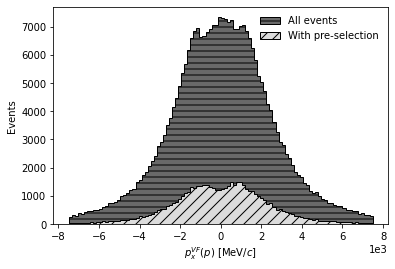

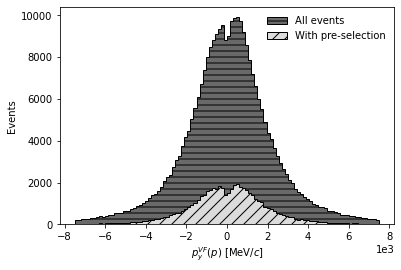

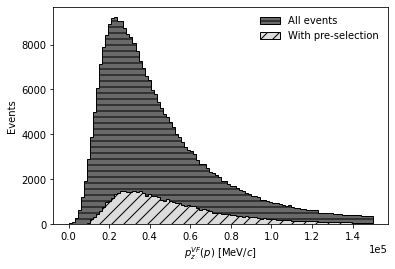

In [28]:
component_to_x_range = {
    'x': (-7.5e3, 7.5e3),
    'y': (-7.5e3, 7.5e3),
    'z': (0, 1.5e5)
}

plot_parameters = {
    ## Particle stuff
    'particle_name_for_title': 'Proton',
    'particle_name_for_filename': 'proton',
    'particle_symbol_for_label': 'p',
    'particle_identifier_for_df': 'p',
    'component_to_x_range': component_to_x_range,
    'momentum_type': 'VF',
    ## Plot stuff
    'binning': 100,
    'zero_vline': False,
    'log_scale': False,
    'show_title': show_titles,
    'black_and_white': bw,
    'show_grid': show_grid,
    'scientific_notation': True,
    'show_no_cuts': show_no_cuts    
}

plot_particle_momenta(**plot_parameters)

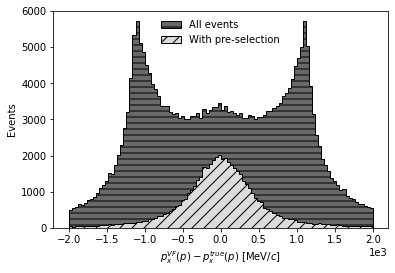

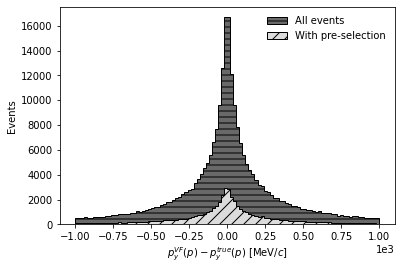

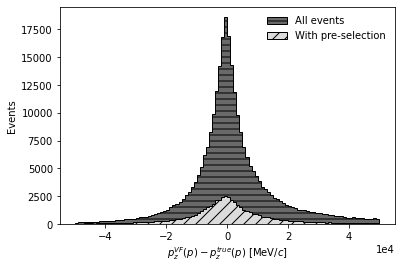

In [29]:
component_to_x_range = {
    'x': (-2e3, 2e3),
    'y': (-1e3, 1e3),
    'z': (-5e4, 5e4)
}

plot_parameters = {
    ## Particle stuff
    'particle_name_for_title': 'Proton',
    'particle_name_for_filename': 'proton',
    'particle_symbol_for_label': 'p',
    'particle_identifier_for_df': 'p',
    'component_to_x_range': component_to_x_range,
    'momentum_type': 'VF',
    ## Plot stuff
    'binning': 100,
    'zero_vline': False,
    'log_scale': False,
    'show_title': show_titles,
    'black_and_white': bw,
    'show_grid': show_grid,
    'scientific_notation': True,
    'show_no_cuts': show_no_cuts,
    'legend_loc': 'upper center',
    'legend_loc_on': ['x']
}

plot_particle_momenta_bias(**plot_parameters)

For a more in-depth look at the two "blobs" in the $p_x (p)$ distribution, check out the proton momenta anomaly study.

### Decay Tree Fitter (with $J/\psi$ mass constraint)

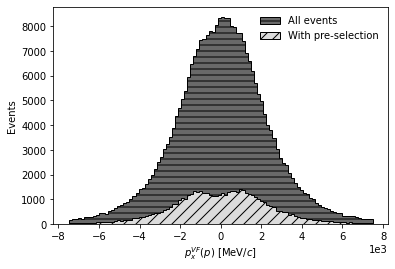

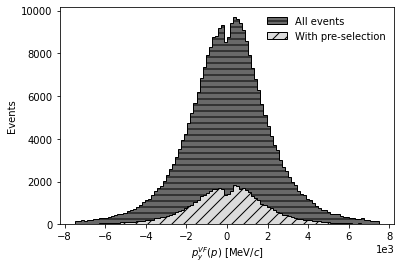

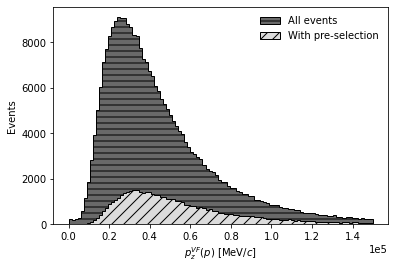

In [30]:
component_to_x_range = {
    'x': (-7.5e3, 7.5e3),
    'y': (-7.5e3, 7.5e3),
    'z': (0, 1.5e5)
}

plot_parameters = {
    ## Particle stuff
    'particle_name_for_title': 'Proton',
    'particle_name_for_filename': 'proton',
    'particle_symbol_for_label': 'p',
    'particle_identifier_for_df': 'p',
    'component_to_x_range': component_to_x_range,
    'momentum_type': 'DTF',
    ## Plot stuff
    'binning': 100,
    'zero_vline': False,
    'log_scale': False,
    'show_title': show_titles,
    'black_and_white': bw,
    'show_grid': show_grid,
    'scientific_notation': True,
    'show_no_cuts': show_no_cuts,
}

plot_particle_momenta(**plot_parameters)

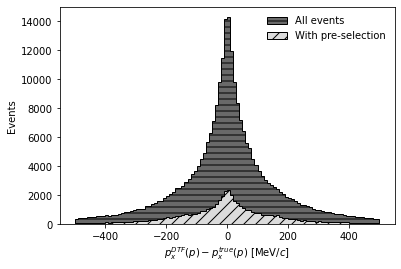

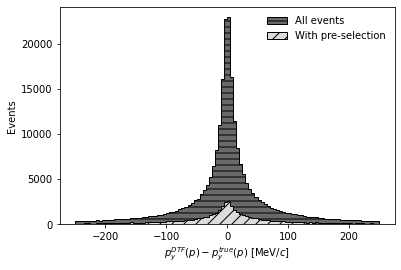

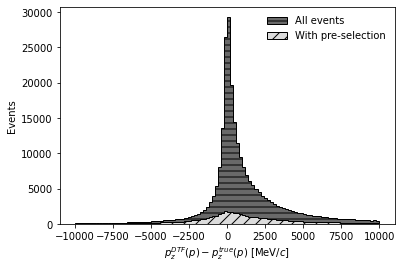

In [31]:
component_to_x_range = {
    'x': (-500, 500),
    'y': (-250, 250),
    'z': (-1e4, 1e4)
}

plot_parameters = {
    ## Particle stuff
    'particle_name_for_title': 'Proton',
    'particle_name_for_filename': 'proton',
    'particle_symbol_for_label': 'p',
    'particle_identifier_for_df': 'p',
    'component_to_x_range': component_to_x_range,
    'momentum_type': 'DTF',
    ## Plot stuff
    'binning': 100,
    'zero_vline': False,
    'log_scale': False,
    'show_title': show_titles,
    'black_and_white': bw,
    'show_grid': show_grid,
    'scientific_notation': False,
    'show_no_cuts': show_no_cuts,
}

plot_particle_momenta_bias(**plot_parameters)

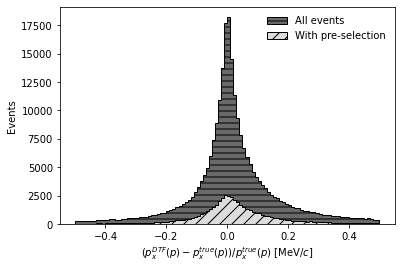

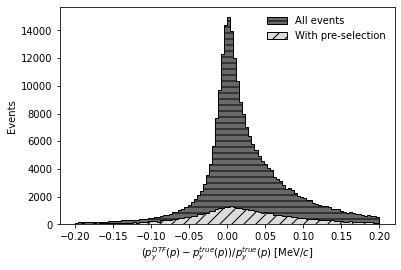

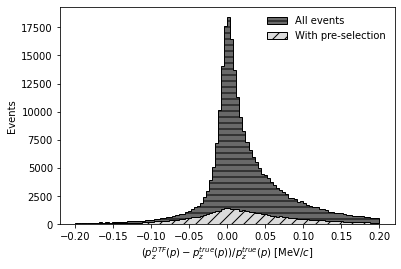

In [32]:
component_to_x_range = {
    'x': (-.5, .5),
    'y': (-.2, .2),
    'z': (-.2, .2)
}

plot_parameters = {
    ## Particle stuff
    'particle_name_for_title': 'Proton',
    'particle_name_for_filename': 'proton',
    'particle_symbol_for_label': 'p',
    'particle_identifier_for_df': 'p',
    'component_to_x_range': component_to_x_range,
    'momentum_type': 'DTF',
    ## Plot stuff
    'binning': 100,
    'zero_vline': False,
    'log_scale': False,
    'show_title': show_titles,
    'black_and_white': bw,
    'show_grid': show_grid,
    'scientific_notation': False,
    'show_no_cuts': show_no_cuts,
    'relative_bias': True
}

plot_particle_momenta_bias(**plot_parameters)

## Pion momentum
### Vertex Fitter

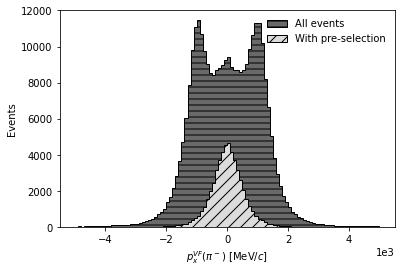

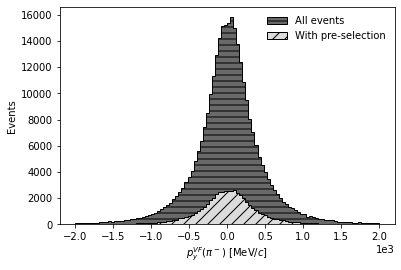

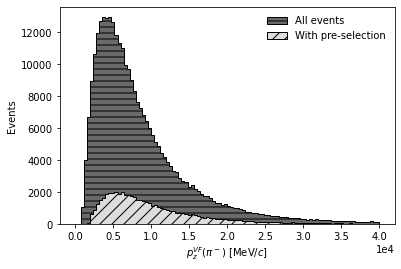

In [33]:
component_to_x_range = {
    'x': (-5e3, 5e3),
    'y': (-2e3, 2e3),
    'z': (0, 4e4)
}

plot_parameters = {
    ## Particle stuff
    'particle_name_for_title': 'Pion',
    'particle_name_for_filename': 'pion',
    'particle_symbol_for_label': '\pi^-',
    'particle_identifier_for_df': 'pim',
    'component_to_x_range': component_to_x_range,
    'momentum_type': 'VF',
    ## Plot stuff
    'binning': 100,
    'zero_vline': False,
    'log_scale': False,
    'show_title': show_titles,
    'black_and_white': bw,
    'show_grid': show_grid,
    'scientific_notation': True,
    'show_no_cuts': show_no_cuts    
}

plot_particle_momenta(**plot_parameters)

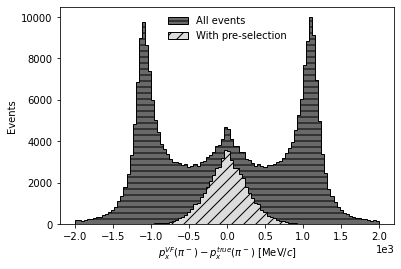

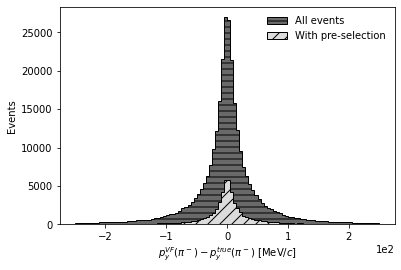

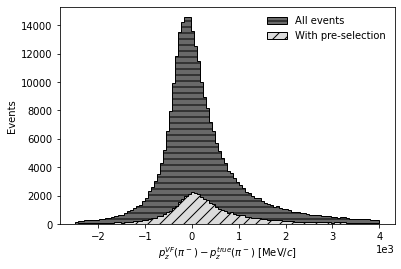

In [34]:
component_to_x_range = {
    'x': (-2e3, 2e3),
    'y': (-2.5e2, 2.5e2),
    'z': (-2.5e3, 4e3)
}
plot_parameters = {
    ## Particle stuff
    'particle_name_for_title': 'Pion',
    'particle_name_for_filename': 'pion',
    'particle_symbol_for_label': '\pi^-',
    'particle_identifier_for_df': 'pim',
    'component_to_x_range': component_to_x_range,
    'momentum_type': 'VF',
    ## Plot stuff
    'binning': 100,
    'zero_vline': False,
    'log_scale': False,
    'show_title': show_titles,
    'black_and_white': bw,
    'show_grid': show_grid,
    'scientific_notation': True,
    'show_no_cuts': show_no_cuts,
    'legend_loc': 'upper center',
    'legend_loc_on': ['x']
}

plot_particle_momenta_bias(**plot_parameters)

### Decay Tree Fitter (with $J/\psi$ mass constraint)

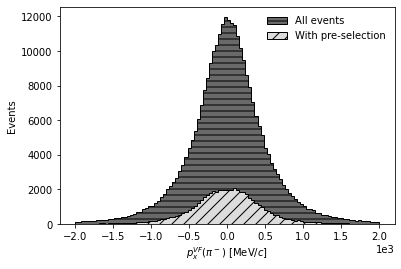

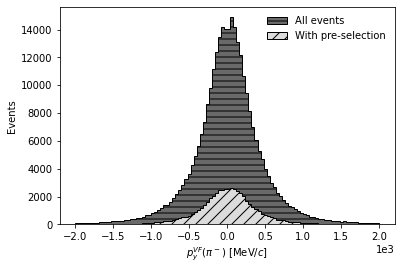

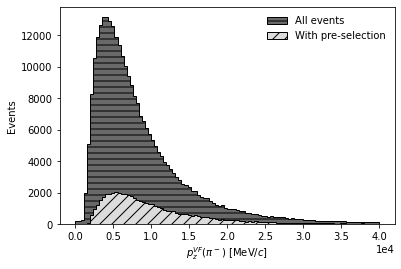

In [35]:
component_to_x_range = {
    'x': (-2e3, 2e3),
    'y': (-2e3, 2e3),
    'z': (0, 4e4)
}

plot_parameters = {
    ## Particle stuff
    'particle_name_for_title': 'Pion',
    'particle_name_for_filename': 'pion',
    'particle_symbol_for_label': '\pi^-',
    'particle_identifier_for_df': 'pim',
    'component_to_x_range': component_to_x_range,
    'momentum_type': 'DTF',
    ## Plot stuff
    'binning': 100,
    'zero_vline': False,
    'log_scale': False,
    'show_title': show_titles,
    'black_and_white': bw,
    'show_grid': show_grid,
    'scientific_notation': True,
    'show_no_cuts': show_no_cuts,
}

plot_particle_momenta(**plot_parameters)

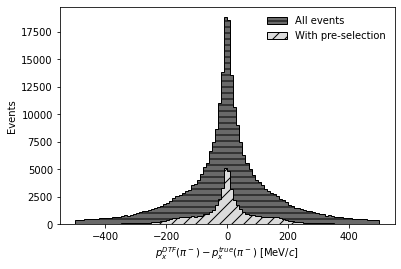

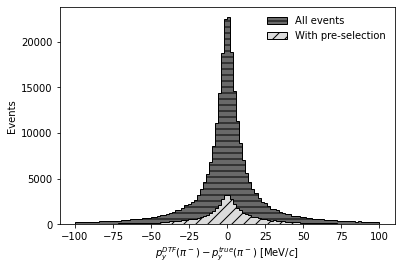

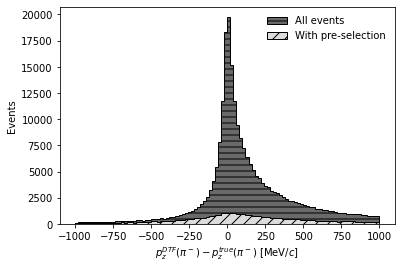

In [36]:
component_to_x_range = {
    'x': (-500, 500),
    'y': (-100, 100),
    'z': (-1000, 1000)
}

plot_parameters = {
    ## Particle stuff
    'particle_name_for_title': 'Pion',
    'particle_name_for_filename': 'pion',
    'particle_symbol_for_label': '\pi^-',
    'particle_identifier_for_df': 'pim',
    'component_to_x_range': component_to_x_range,
    'momentum_type': 'DTF',
    ## Plot stuff
    'binning': 100,
    'zero_vline': False,
    'log_scale': False,
    'show_title': show_titles,
    'black_and_white': bw,
    'show_grid': show_grid,
    'scientific_notation': False,
    'show_no_cuts': show_no_cuts,
}

plot_particle_momenta_bias(**plot_parameters)

## $\Lambda^0$ momentum
Composite particles have no MCTRUTH info and no DTF individual momenta. This is fine.
### Vertex Fitter

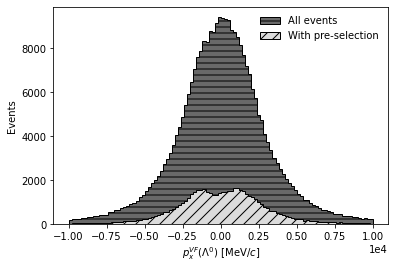

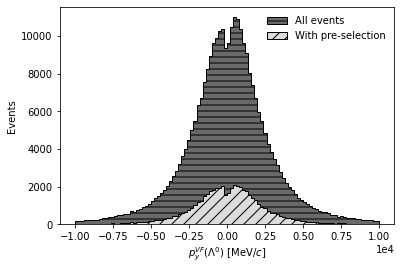

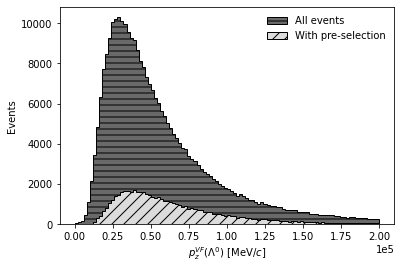

In [37]:
component_to_x_range = {
    'x': (-1e4, 1e4),
    'y': (-1e4, 1e4),
    'z': (0, 2e5)
}

plot_parameters = {
    ## Particle stuff
    'particle_name_for_title': '$\Lambda^0$',
    'particle_name_for_filename': 'Lambda',
    'particle_symbol_for_label': '\Lambda^0',
    'particle_identifier_for_df': 'L',
    'component_to_x_range': component_to_x_range,
    'momentum_type': 'VF',
    ## Plot stuff
    'binning': 100,
    'zero_vline': False,
    'log_scale': False,
    'show_title': show_titles,
    'black_and_white': bw,
    'show_grid': show_grid,
    'scientific_notation': True,
    'show_no_cuts': show_no_cuts    
}

plot_particle_momenta(**plot_parameters)

## $\Lambda^0_b$ momentum
### Vertex Fitter

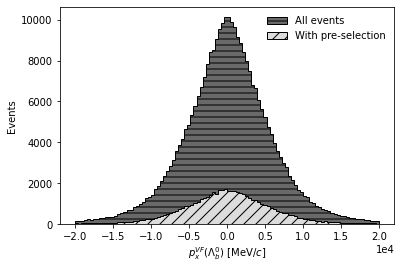

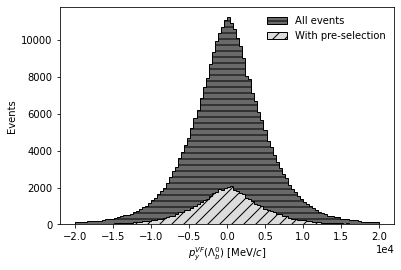

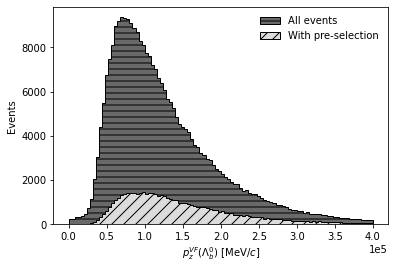

In [38]:
component_to_x_range = {
    'x': (-2e4, 2e4),
    'y': (-2e4, 2e4),
    'z': (0, 4e5)
}

plot_parameters = {
    ## Particle stuff
    'particle_name_for_title': '$\Lambda^0_b$',
    'particle_name_for_filename': 'Lambdab',
    'particle_symbol_for_label': '\Lambda^0_b',
    'particle_identifier_for_df': 'Lb',
    'component_to_x_range': component_to_x_range,
    'momentum_type': 'VF',
    ## Plot stuff
    'binning': 100,
    'zero_vline': False,
    'log_scale': False,
    'show_title': show_titles,
    'black_and_white': bw,
    'show_grid': show_grid,
    'scientific_notation': True,
    'show_no_cuts': show_no_cuts    
}

plot_particle_momenta(**plot_parameters)